In [1]:
import cv2
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import os
import sys

output_folder = 'output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

path_working_on = 'working_on.jpg'

PseudoCode

In [2]:
"""
#function to detect if the image is blurry or not (def detect_blurry_and_contrast_image)

load image in grayscale

if detect_low_contrast_image(img)==true {
    print("image is low contrast")
    process_low_contrast_image(img) 

    if detect_blurry_image(binary_image)==true{
    apply process_blurry_image(binary_image)
    }
    else{
    return false image is not blurry
    }
}
else{
    print("image is not low contrast")
    if detect_blurry_image(img)==true{
    print("image is blurry")
    process_blurry_image(img)
     
    }
    else{
     print("image is not blurry")
     return false image is not blurry
    }
}end of function

"""



'\n#function to detect if the image is blurry or not (def detect_blurry_and_contrast_image)\n\nload image in grayscale\n\nif detect_low_contrast_image(img)==true {\n    print("image is low contrast")\n    process_low_contrast_image(img) \n\n    if detect_blurry_image(binary_image)==true{\n    apply process_blurry_image(binary_image)\n    }\n    else{\n    return false image is not blurry\n    }\n}\nelse{\n    print("image is not low contrast")\n    if detect_blurry_image(img)==true{\n    print("image is blurry")\n    process_blurry_image(img)\n     \n    }\n    else{\n     print("image is not blurry")\n     return false image is not blurry\n    }\n}end of function\n\n'

In [3]:
def process_blurry_images(image_path):
    """
    Process an image to prepare it for barcode detection. This includes sharpening,
    converting to grayscale, and applying binary thresholding.

    Parameters:
    - image_path (str): Path to the image file.
    """
    try:
        # Load the image
        image = Image.open(image_path)

        # Display the original image
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.title("Original Image")
        plt.axis("off")
        plt.show()

        # Step 1: Apply sharpening filter
        sharpened_image = image.filter(ImageFilter.SHARPEN)

        # Step 2: Convert the sharpened image to grayscale using OpenCV
        sharpened_image_cv = cv2.cvtColor(np.array(sharpened_image), cv2.COLOR_RGB2BGR)
        gray_image = cv2.cvtColor(sharpened_image_cv, cv2.COLOR_BGR2GRAY)

        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        closed_image = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, kernel)

        # Step 3: Apply binary thresholding to isolate the barcode
        _, binary_image = cv2.threshold(closed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Save the processed image 
        file_name = os.path.basename(image_path)
        first_two_chars = file_name[:2]  # Get the first two characters
        file_extension = os.path.splitext(file_name)[-1]  # Get the file extension
        output_image_name = f"{first_two_chars}{file_extension}"
        output_image_path = os.path.join(output_folder, output_image_name)
        cv2.imwrite(path_working_on, binary_image)
        print(f"Processed image saved to {output_image_path}")

        # Display the binary image
        plt.figure(figsize=(12, 8))
        plt.imshow(binary_image, cmap="gray")
        plt.title("Binary Image")
        plt.axis("off")
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")


def process_low_contrast_image(image_path):
    """
    Process the image by converting it to grayscale, applying median blur, 
    and performing binary thresholding.

    Parameters:
    - image_path (str): Path to the image file.

    Returns:
    - binary_image (numpy.ndarray): The binary thresholded image.
    """
    # Load the original image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply median blur to the grayscale image
    blurred_image = cv2.medianBlur(image, 3)

    # Apply binary thresholding
    _, binary_image = cv2.threshold(blurred_image, 125, 255, cv2.THRESH_BINARY)

    # Save the processed image 
    file_name = os.path.basename(image_path)
    first_two_chars = file_name[:2]  # Get the first two characters
    file_extension = os.path.splitext(file_name)[-1]  # Get the file extension
    output_image_name = f"{first_two_chars}{file_extension}"
    output_image_path = os.path.join(output_folder, output_image_name)
    cv2.imwrite(path_working_on, binary_image)
    print(f"Processed image saved")


    return binary_image

def detect_Low_contrast_image(image_path, contrast_threshold=9):
    """
    Detect if an image has low contrast.

    Parameters:
    - image_path (str): Path to the image file.
    - contrast_threshold (float): Threshold value for determining if the image has low contrast.

    Returns:
    - is_low_contrast (bool): True if the image has low contrast, False otherwise.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or unable to load.")

    # Calculate the standard deviation of pixel intensities
    std_dev = np.std(image)

    # Print the value of standard deviation
    print(f"Standard deviation for {image_path}: {std_dev}")

    # Check if standard deviation is below the threshold
    return std_dev < contrast_threshold

def detect_blurry_image(image_path, blur_threshold=270):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or unable to load.")

    # Compute the Laplacian of the image
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()

    # Check if the variance of the Laplacian is below the threshold
    is_blurry = laplacian_var < blur_threshold
    return is_blurry, laplacian_var


Standard deviation for test cases/05 - meen taffa el nour!!!.jpg: 4.441884023353947
Image is low contrast.
Processed image saved
Processed image is still blurry, applying blur correction.


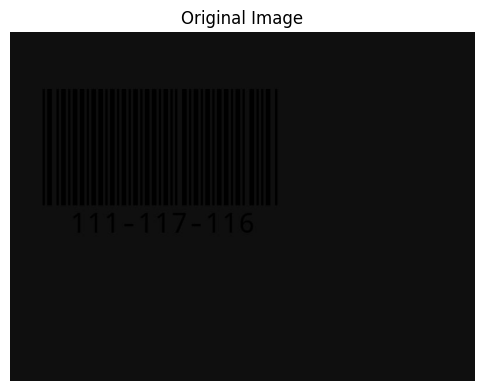

Processed image saved to output\05.jpg


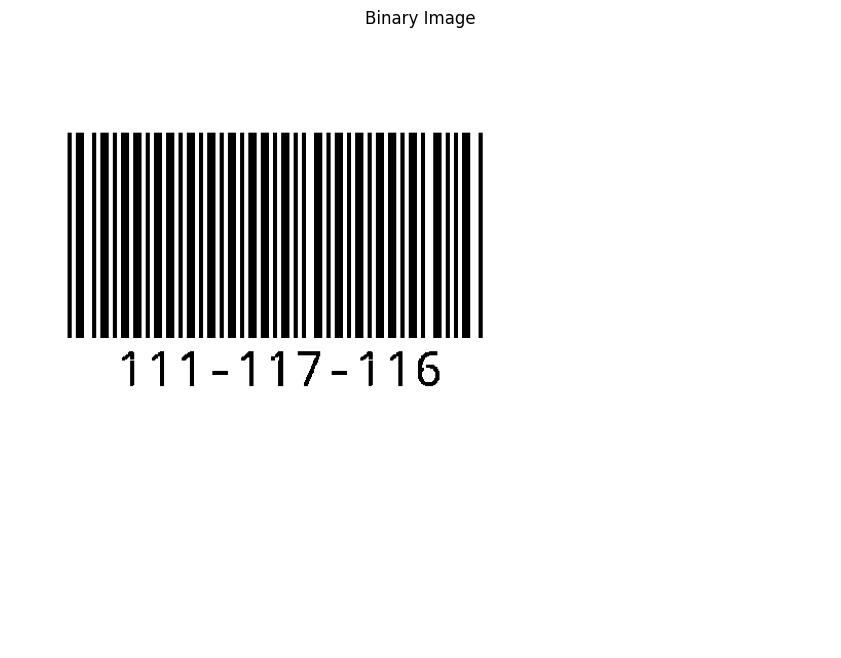

No salt-and-pepper noise detected.
No compressed image detected.
Preprocessed image for rotation.
Detected angle: -90.00 degrees
Is rotated: False
Image is already in correct orientation.
Corrected image saved to working_on.jpg.


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
from rotation import rotate_barcode
def detect_blurry_and_contrast_image(image_path):
    """
    Analyze an image for low contrast and blurriness, process it accordingly,
    and provide feedback on its status.

    Parameters:
    - image_path (str): Path to the image file.
    """
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or unable to load.")

    # Detect low contrast
    if detect_Low_contrast_image(image_path):
        print("Image is low contrast.")
        process_low_contrast_image(image_path)  # Processing low contrast image

        # Detect if the resulting image from low contrast processing is blurry
        is_blurry, _ = detect_blurry_image(image_path)
        if is_blurry:
            print("Processed image is still blurry, applying blur correction.")
            process_blurry_images(image_path)  # Further processing if blurry
        else:
            print("Processed image is not blurry.")
            return False
    else:
        print("Image is not low contrast.")

        # Check for blurriness on the original image
        is_blurry, _ = detect_blurry_image(image_path)
        if is_blurry:
            print("Image is blurry.")
            process_blurry_images(image_path)  # Processing blurry image
        else:
            print("Image is not blurry.")
            cv2.imwrite(path_working_on, img)

def detect_salt_pepper(image_path, edge_threshold=0.23, diff_threshold=67):

        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
                raise ValueError("Image not found or unable to load.")

        edges = cv2.Laplacian(image, cv2.CV_64F)
        edges = np.abs(edges)

        edge_pixels = np.sum(edges > 50)
        total_pixels = image.size
        edge_ratio = edge_pixels / total_pixels

        if edge_ratio > edge_threshold:
                filtered = cv2.medianBlur(image, 3)
                diff = cv2.absdiff(image, filtered)
                
                noisy_pixels = np.sum(diff > diff_threshold)
                noise_ratio = noisy_pixels / total_pixels

                
                if noise_ratio > 0.01:
                        print("Salt-and-pepper noise detected.")
                        remove_salt_pepper(image_path)
                else:
                    print("No salt-and-pepper noise detected.")
                    cv2.imwrite(path_working_on, image)
        else:
            print("No salt-and-pepper noise detected.")
            cv2.imwrite(path_working_on, image)


def remove_salt_pepper(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or unable to load.")

    # Apply vertical blur to reduce vertical noise streaks
    vertical_blur = cv2.blur(image, (1, 7))

    # Apply median blur to reduce salt-and-pepper noise further
    median_blur = cv2.medianBlur(vertical_blur, 3)

    # Apply Otsu's thresholding for binary segmentation
    _, thresholded_image = cv2.threshold(median_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Save the final processed image
    cv2.imwrite(path_working_on, thresholded_image)


#object
def detect_interrupted_lines(image_path, gap_threshold=278):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    original_image = image
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=gap_threshold)
    if lines is None:
        return False
    lines = [line[0] for line in lines]
    vertical_lines = sorted(lines, key=lambda x: x[0])
    interrupted_lines = []
    for i in range(1, len(vertical_lines)):
        prev_line = vertical_lines[i - 1]
        curr_line = vertical_lines[i]
        if abs(curr_line[0] - prev_line[0]) < gap_threshold:
            gap = curr_line[1] - prev_line[3]
            if gap > gap_threshold:
                interrupted_lines.append((prev_line, curr_line))
    if interrupted_lines:
        print("Interrupted lines detected.")
        fixing_object(image_path)
    else:
        cv2.imwrite(path_working_on, original_image)
    
def fixing_object(image_path, threshold_value = 25):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    cv2.imwrite(path_working_on, thresholded_image)



#detect compressed image
def detection_compressed(image_path):
    size = os.path.getsize(image_path)
    if size < 22000:
        print("Compressed image detected.")
        process_blurry_images(image_path)
    else:
        print("No compressed image detected.")
        return image_path


image_path = 'test cases/05 - meen taffa el nour!!!.jpg'
detect_blurry_and_contrast_image(image_path)
detect_salt_pepper(path_working_on)
detect_interrupted_lines(path_working_on)
detection_compressed(path_working_on)
rotate_barcode(image_path=path_working_on, output_path=path_working_on)

